# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

In [3]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
import cv2

In [5]:
import time

In [6]:
import matplotlib.image as mpimg

In [7]:
# Development/Debugging Variables
visulize = True
generate_extra_data = True
normalize_features = True

In [8]:
np.set_printoptions(precision=3)

In [9]:
# Load pickled data

# Dataset saved at these locations:
training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Done importing data.")

Done importing data.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [10]:
# Structure Notes:
#Features: [([({r,g,b})..32]..32),()]
#Labels: [#,#...each element has a label. See the labels file.]

# Number of training examples:
n_train = len(X_train)
# X_train has a list of all of the training images

# Number of testing examples:
n_test = len(X_test)
# X_test has a list of all of the test images

# Shape of an traffic sign image:
image_shape = "{}x{}x{}".format(len(X_train[0]), len(X_train[0][0]), len(X_train[0][0][0]))
# you can take either train features or test features, and then dig into the elements to get dimensions

# Number of unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1
# The labels are defined in a csv file. They are zero indexed.

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32x3
Number of classes = 43


In [11]:
# Create a map for all the classes:
class_map = {}
class_map[0] = 'Speed limit (20km/h)'
class_map[1] = 'Speed limit (30km/h)'
class_map[2] = 'Speed limit (50km/h)'
class_map[3] = 'Speed limit (60km/h)'
class_map[4] = 'Speed limit (70km/h)'
class_map[5] = 'Speed limit (80km/h)'
class_map[6] = 'End of speed limit (80km/h)'
class_map[7] = 'Speed limit (100km/h)'
class_map[8] = 'Speed limit (120km/h)'
class_map[9] = 'No passing'
class_map[10] = 'No passing for vehicles over 3.5 metric tons'
class_map[11] = 'Right-of-way at the next intersection'
class_map[12] = 'Priority road'
class_map[13] = 'Yield'
class_map[14] = 'Stop'
class_map[15] = 'No vehicles'
class_map[16] = 'Vehicles over 3.5 metric tons prohibited'
class_map[17] = 'No entry'
class_map[18] = 'General caution'
class_map[19] = 'Dangerous curve to the left'
class_map[20] = 'Dangerous curve to the right'
class_map[21] = 'Double curve'
class_map[22] = 'Bumpy road'
class_map[23] = 'Slippery road'
class_map[24] = 'Road narrows on the right'
class_map[25] = 'Road work'
class_map[26] = 'Traffic signals'
class_map[27] = 'Pedestrians'
class_map[28] = 'Children crossing'
class_map[29] = 'Bicycles crossing'
class_map[30] = 'Beware of ice/snow'
class_map[31] = 'Wild animals crossing'
class_map[32] = 'End of all speed and passing limits'
class_map[33] = 'Turn right ahead'
class_map[34] = 'Turn left ahead'
class_map[35] = 'Ahead only'
class_map[36] = 'Go straight or right'
class_map[37] = 'Go straight or left'
class_map[38] = 'Keep right'
class_map[39] = 'Keep left'
class_map[40] = 'Roundabout mandatory'
class_map[41] = 'End of no passing'
class_map[42] = 'End of no passing by vehicles over 3.5 metric tons'

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [12]:
### Data exploration and visualizations

In [13]:
# dictionary containing string class name to image
reff_dict = {}

# dictionary containing class id int to image
reff_dict2 = {}

In [14]:
# Turn on option in Jupiter Notebook so visualizations are embedded.
%matplotlib inline

In [15]:
# Display samples of all of the types of classes
# TODO: Make this one more efficient, the time complexity is bad
def visualize_classes():
    train_features = np.array(train['features'])
    train_labels = np.array(train['labels'])

    # Create the figure
    fig = plt.figure(figsize=(17,40))

    for i in range(n_classes):
        for j in range(len(train_labels)):
            if (i == train_labels[j]):
                ax = fig.add_subplot(11,4,i+1)#
                ax.set_title(class_map[i])
                plt.imshow(train_features[j].squeeze())
                reff_dict[class_map[i]] = train_features[j]
                reff_dict2[i] = train_features[j]
                break
    
# Create a chart of Inputs vs Classes
def graph_number_of_inputs(figure_number):
    train_labels = np.array(y_train)
    inputs_per_class = np.bincount(train_labels)
    
    plt.ylabel('Count of Images')
    plt.xlabel('Label ID')
    plt.title('Figure '+ str(figure_number) +': Count Of Labels Per ID')
    plt.bar(range(len(inputs_per_class)), inputs_per_class, 2/3, color='black', label='Inputs per class')
    plt.axis('tight')
    plt.subplots_adjust(bottom=0.1, right=1, top=0.9)
    plt.grid(True)
    plt.show()

Visualizing



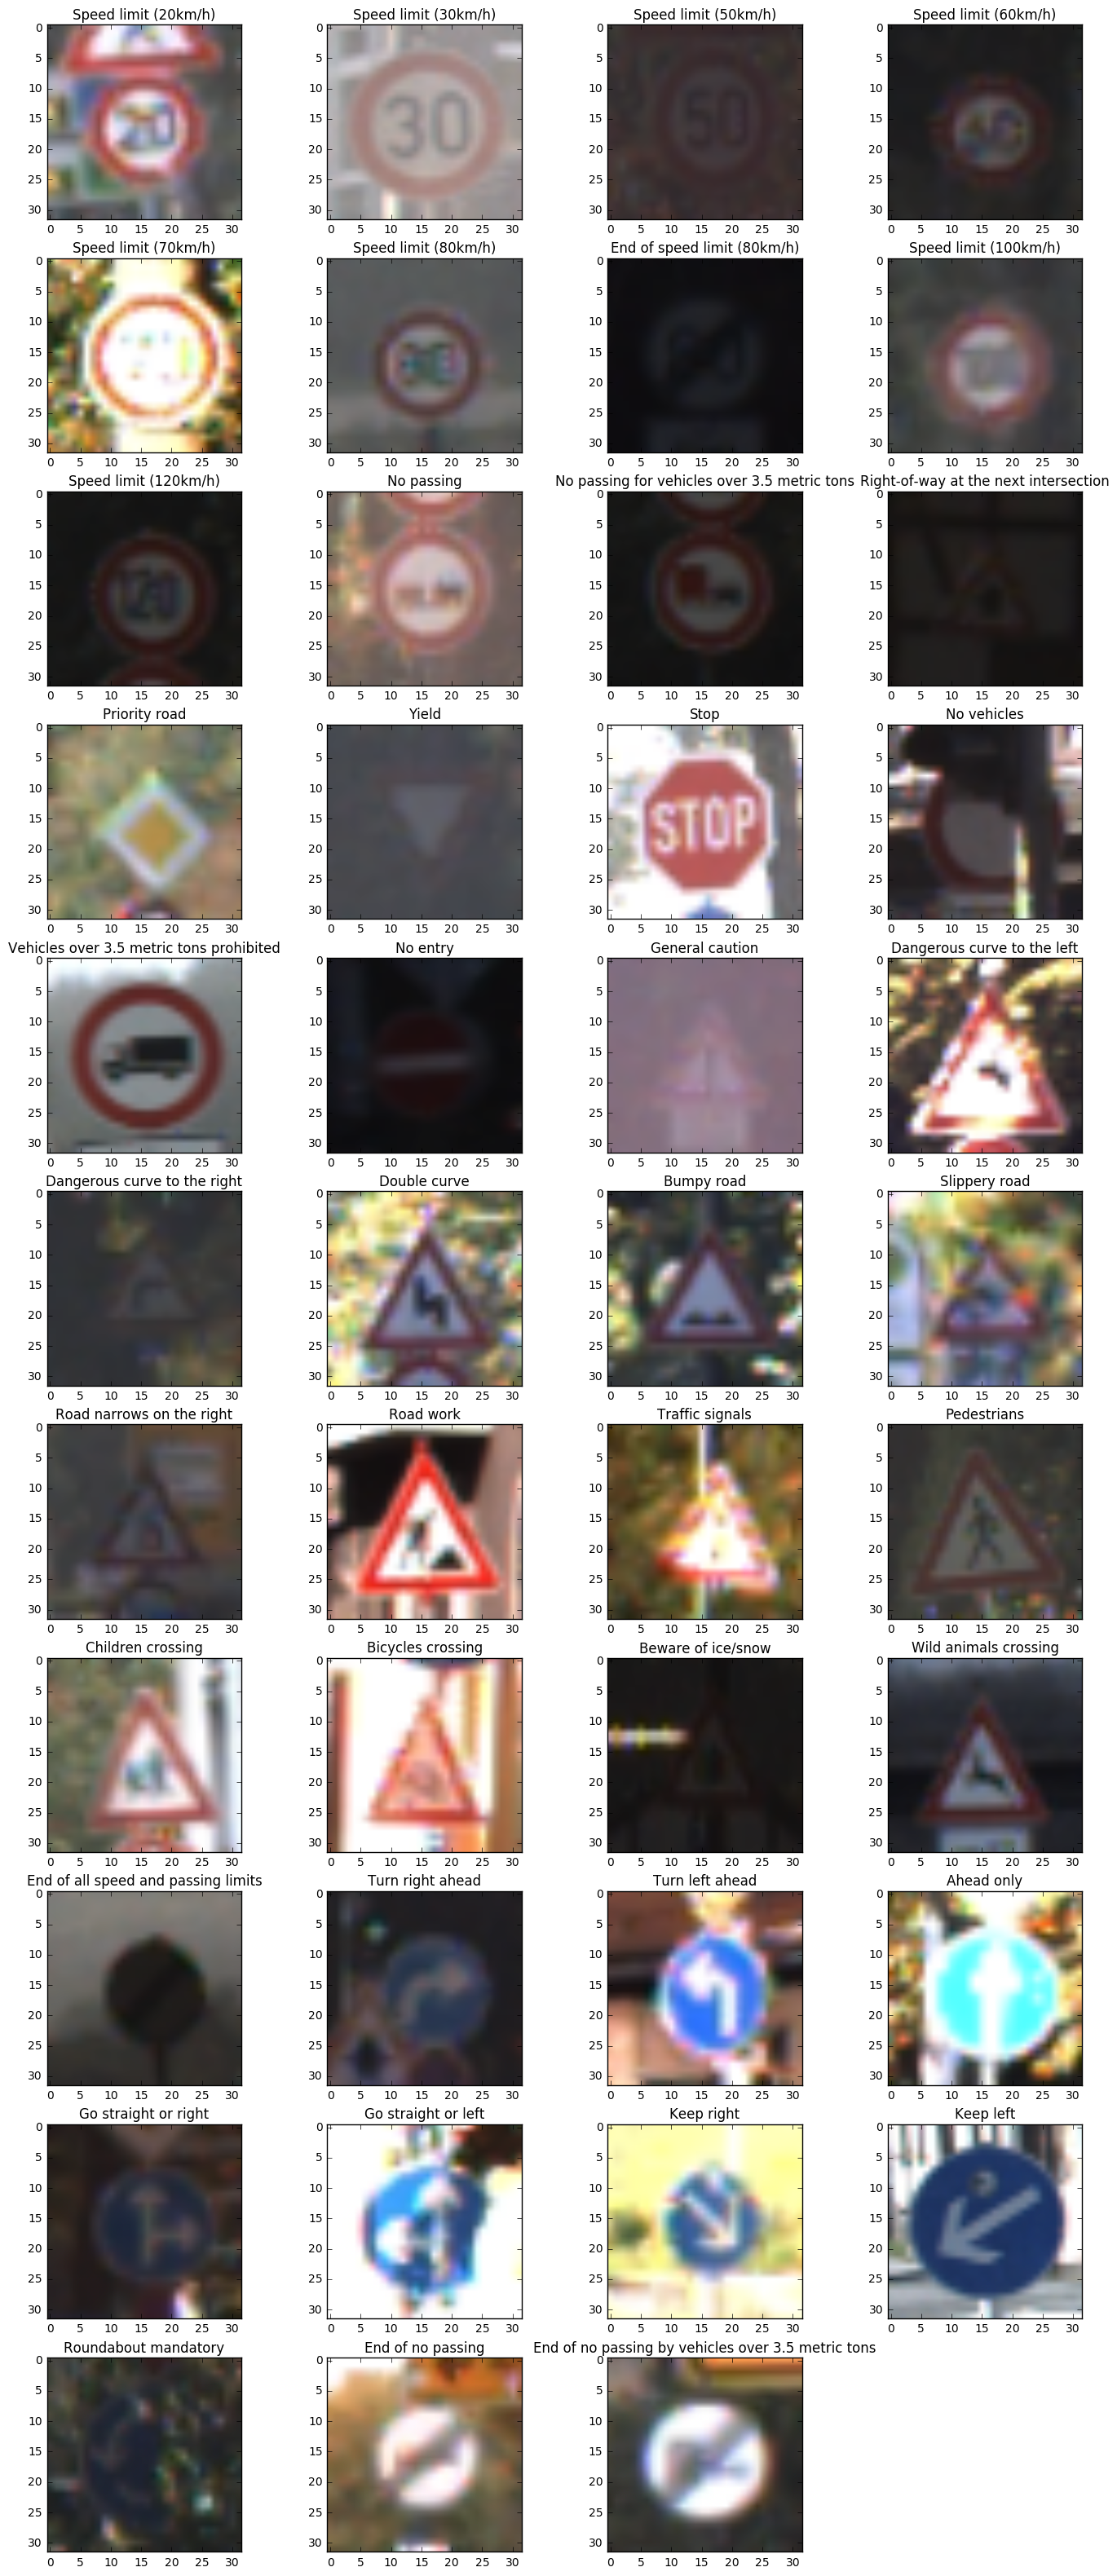

In [16]:
if(visulize):
    print("Visualizing\n")
    visualize_classes()

Visualizing: Figure 1



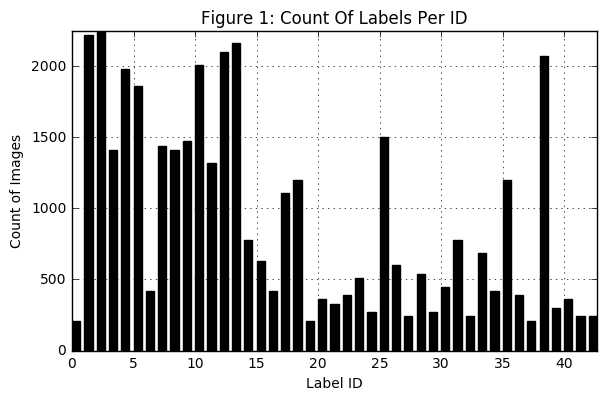

In [17]:
if(visulize):
    print("Visualizing: Figure 1\n")
    graph_number_of_inputs(1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I did alot of research and reading about different ways to augment the data. From changing the color scale, removing color altogether, and also read about a technique for learning the color space seperately. All of these were interesting, but I did not opt to implement these just yet. I want to build a model that works on the raw images first to see how well it can perform. Afterwards, I would be curious to see the results on grayscale images.

Here is what I did implement though (code is in block for Question 2):
    
- I balanced the number of input images across different classes (generation of data) to reduce bias towards any one class.
- I randomized (shuffled) the input images before (and during) training, again to reduce bias.
- I normalized the pixel values to a range between 0.0 and 1.0 to help the optimizer search for good predictions.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The first step I took in this section was to generate extra data. I generated extra data for under-represented classes. To better see this, Figure 1 shows the number of images originally available for each of the classes. 

To generate extra data, I expereimented with two approaches that I saw on the forums: [image "jitter"](https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3#.ljrvf51ch), and [image rotations](https://hackernoon.com/traffic-signs-classification-with-deep-learning-b0cb03e23efb?bsft_eid=7aaf567e-81a0-43fc-9da8-7cb437ced662&bsft_clkid=374c0367-3113-413f-b8eb-65c3bd8cbd20&bsft_uid=1d6d1dce-c197-42bc-b47c-83eafbc25864&bsft_mid=02d62fde-14e7-4a82-9aa7-6bd77fefcbe2#.va8agbhko).

I achieved the best results using the rotation method. For each class that was under-represented, new images rotated at angles like 5, 10, 15, and 20 degrees were genereated and added to the dataset. The dataset would afterwards reflect a more even distribution of images across all of the classes, an important step for keeping the model from guessing in favor of a more represented image. The new distribution of images per class is shown in Figure 2.

To set up the training, I used these methods:
I took the dataset (approximately 50,000 images) and kept the test subset unchanged. I divided the main set into two. One for training and one for validation. I used an 80/20 ratio, 80 percent of the images in the main set where used for training, and 20 percent was used for validation. This ratio is used commonly as a starting point, and it seemed to be working well in this dataset.

In [18]:
### Setting up the data below.

Generating additional data.

Results
Original Distribution Of Input Classes: 43 
 [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]

New Distribution Of Input Classes: 43 
 [1680 2220 2250 1410 1980 1860 2100 1440 1410 1470 2010 1320 2100 2160  780
 1890 2100 1110 1200 1680 2160 1980 1950 2040 2160 1500 1800 1920 2160 2160
 2250  780 1920 2067 2100 1200 1950 1680 2070 2100 2160 1920 1920]

Done generating additional data.

Figure 2: Visualizing Dataset After Generation



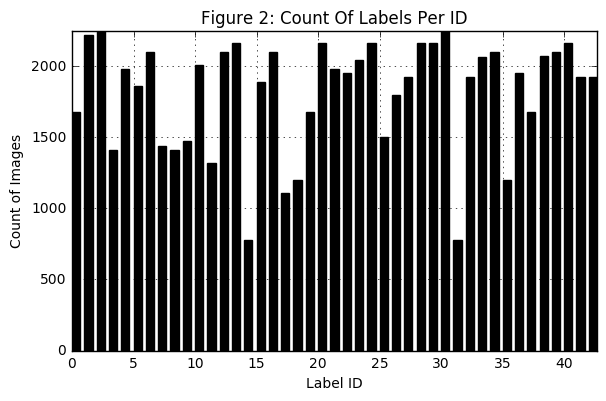

In [19]:
# Generate Additional Input Data (only for classes that do not have enough samples)
if(generate_extra_data):
    print('Generating additional data.')
    #Define angles to iterate through
    rotation_angles = [-5, 5, -10, 10, -15, 15, -20, 20]
    #Create a map of class vs inputs
    inputs_per_class = np.bincount(y_train)
    orig_dist = inputs_per_class
    max_input = np.max(inputs_per_class)

    for i in range(len(inputs_per_class)):
        #For each bucket that does not meet the ratio:
        #All images in the bucket will be rotated through the value of the input_ratio:
        #ex: Class 0 has 210 inputs, and the max_input is 2250
        #    Class 0 will now have: 210 + (210*input_ratio) = ?
        #                           210 + (210*7) = 1680
        input_ratio = min( int(max_input/inputs_per_class[i])-1, len(rotation_angles)-1 )
        #print(int(max_input/inputs_per_class[i])-1, len(rotation_angles)-1, input_ratio, input_ratio <= 1)

        if input_ratio > 1:
            new_images = []
            new_labels = []
            mask = np.where(y_train == i)
            for image in X_train[mask]:
                for j in range(input_ratio):
                    new_images.append(scipy.ndimage.rotate(image, rotation_angles[j], reshape=False))
                    new_labels.append(i)
            #add new data to the existing set
            X_train = np.append(X_train, new_images, axis=0)
            y_train = np.append(y_train, new_labels, axis=0)

    new_dist = np.bincount(y_train)

    print("\nResults")
    print("Original Distribution Of Input Classes:", len(orig_dist), "\n", orig_dist)
    print("\nNew Distribution Of Input Classes:", len(new_dist), "\n", new_dist)

    print('\nDone generating additional data.\n')
    
    
    if(visulize):
        print("Figure 2: Visualizing Dataset After Generation\n")
        graph_number_of_inputs(2)

In [22]:
# # Min-Max scaling of images
# def normalize_images(image_data):
#     a = 0.01
#     b = 0.99
#     color_min = 0.0
#     color_max = 255.0
#     return a + ( ( (image_data - color_min) * (b - a) )/(color_max - color_min))

# X_train = normalize_images(X_train)
# X_test = normalize_images(X_test)
# X_validation = normalize_images(X_validation)

In [20]:
# Normalize images
if(normalize_features):
    X_train = X_train/255. * 0.8 + 0.1
    print('Done normalizing the inputs...')

Done normalizing the inputs...


In [21]:
# Shuffle Data and Create Validation Set
X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=4289)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer:**

I modified the LeNet architecture that was covered in the lectures so that it would accept color images. I also  introduce dropout at each of the fully connected layers. I read about XaviorInitilizations as a better way to initialize weights but did not get to implement this. Instead, I continued to use a normal distribution with specified mean and standard deviation of mu and sigma. The final architecture looks like this:

- Input Image
- Convolutional Layer (5x5 filter).
- Activation.
- Pooling.
    
- Convolutional Layer (5x5 filter).
- Activation.
- Pooling.
- Flatten.    
    
- Fully Connected Layer. 
- Activation.
- Dropout.

- Fully Connected Layer.
- Activation.
- Dropout.
    
- Fully Connected Layer (width of 43)
- Output Logits

In [23]:
# Hyperparameters
EPOCHS = 80
BATCH_SIZE = 256
DROPOUT_RATE = 0.5
LEARNING_RATE = 0.001

In [24]:
# Others
# #EPOCHS = 10
# #BATCH_SIZE = 128
# EPOCHS = 80
# BATCH_SIZE = 25
# DROPOUT_RATE = 0.5
# rate = 0.0001

In [25]:
# Step 1: Define a deep learning network.

# Modified LeNet network (3 channel images)
def LeNet(x):
    # These hyperparameters determine how the weights are initialized
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Kernal is 5x5, going from 3 channels to a 6 "channel" output.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    ##NOTE: output_height = (input_height - kernal_height + 1) / stride
    ##      output = 28x28x6.
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    
    
    # Layer 2: Convolutional. 
    # Input = 14x14x6.
    # Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)
    
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [26]:
# Step 2: Setting up the pipeline for training.

# Set up the features and labels
# x is a placeholder to store the input batches. Setting the first var to None allows us to pass in any batch size.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))

# y stores the labels. the labels in this case are not one-hot encoded.
y = tf.placeholder(tf.int32, (None))

# Then we one-hot encode the labels.
one_hot_y = tf.one_hot(y, n_classes)

dropout = tf.placeholder(tf.float32)

# Training Pipeline
# pass in the input data to the lenet model.
logits = LeNet(x)
prediction_network = tf.nn.softmax(logits) # used to create new image predictions

# calculate the cross-entropy of the logits using the one-hot data. cross-entropy measures the delta of these values.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# the cross-entropy is averaged here.
loss_operation = tf.reduce_mean(cross_entropy)

# here we try to minimize the loss function, similar to stochastic gradient descent.
# AdamOptimizer is more robust than SGD. It is a good default optimizer.
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)

# This is where backpropagation happens.
training_operation = optimizer.minimize(loss_operation)

In [27]:
# Step 3: Setting up the pipeline for evaluating the model.

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# takes in the entire dataset. performs the accuracy_operation on it.
def evaluate(X_data, y_data, dropout_rate):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout:dropout_rate})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam Optimizer and a learning rate of 0.001. These are good default values, and I did not tweak them since I got pretty good results with them. The hyperparameters I used were: 
- batch size of 256
- 80 epochs
- dropout rate of 0.5. 

I settled on these values after doing alot of trial and error type experiements.

In [ ]:
### Train the model below.

In [ ]:
# Step 4: Train the model

# Train the Model
with tf.Session() as sess:
    # Create the session and initiate the variables.
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    start = time.time()
    
    print()
    # train over the number of specified EPOCHS
    for i in range(EPOCHS):
        # shuffle the data
        X_train, y_train = shuffle(X_train, y_train)
        
        # break the training data into batches, train on a specific batch.
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            # training step
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout:DROPOUT_RATE})
        
        validation_accuracy = evaluate(X_validation, y_validation, dropout_rate=1.0) # Use Dropout Rate 1.0 for Validation.
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    # Save the resulting model.
    saver.save(sess, 'lenet')
    print("Model saved")
    end = time.time()
    
    print("Time Elapsed:", (end-start) )

Training...

EPOCH 1 ...
Validation Accuracy = 0.599

EPOCH 2 ...
Validation Accuracy = 0.804

EPOCH 3 ...
Validation Accuracy = 0.871

EPOCH 4 ...
Validation Accuracy = 0.906

EPOCH 5 ...
Validation Accuracy = 0.932

EPOCH 6 ...
Validation Accuracy = 0.945

EPOCH 7 ...
Validation Accuracy = 0.954

EPOCH 8 ...
Validation Accuracy = 0.958

EPOCH 9 ...
Validation Accuracy = 0.966

EPOCH 10 ...
Validation Accuracy = 0.971

EPOCH 11 ...
Validation Accuracy = 0.973

EPOCH 12 ...
Validation Accuracy = 0.978

EPOCH 13 ...
Validation Accuracy = 0.979

EPOCH 14 ...
Validation Accuracy = 0.981

EPOCH 15 ...
Validation Accuracy = 0.982

EPOCH 40 ...
Validation Accuracy = 0.992

EPOCH 41 ...
Validation Accuracy = 0.991

EPOCH 42 ...
Validation Accuracy = 0.992

EPOCH 43 ...
Validation Accuracy = 0.991

EPOCH 44 ...
Validation Accuracy = 0.991

EPOCH 45 ...
Validation Accuracy = 0.992

EPOCH 46 ...
Validation Accuracy = 0.992

EPOCH 47 ...
Validation Accuracy = 0.993

EPOCH 48 ...
Validation Accura

In [ ]:
# Final Step: Evaluate the Model Using Test Data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, dropout_rate=1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.938


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started off with a well known implementation. I used the LeNet model that was discussed in the lectures and adjusted it for the input of color images. The LeNet structure we studied in lecture also worked on 32x32 pixel images, so that also worked perfectly for the traffic sign images. After this, I started adding some of the other concepts that were discussed in lecture. I looked at how my model was performing to figure out when to terminate. I included dropout and randomized the input data. After all of this, I started doing research on ways to optimize even further. Hopefully, I can implement some more optimizations to further increase the robustness of my model, and to prevent the model from being overfit.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them.

In [ ]:
# easy images
image_names = ['pri_new.jpg', 'road_work_new.jpg', 'speed_120.jpg', 'turn_right_new.jpg', 'wild_new.jpg']
new_images = []
for name in image_names:
    image = mpimg.imread('new_images/' + name)
    new_images.append(image)

In [ ]:
# harder images
hard_image_names = ['speed_bump_jpg.jpg', 'yield_jpg.jpg', 'speed_130_jpg.jpg', 'jap_stop_jpg.jpg', 'yellow_arrow_jpg.jpg']
for name in hard_image_names:
    image = mpimg.imread('new_images/' + name)
    new_images.append(image)

Done displaying new images.


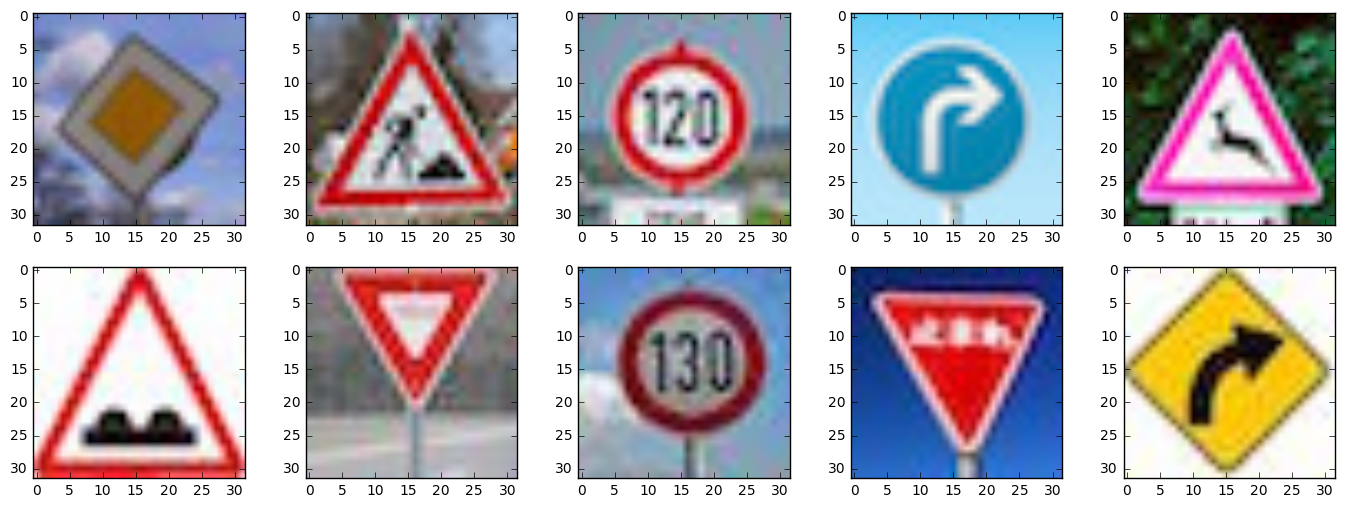

In [ ]:
# Create the figure
fig = plt.figure(figsize=(17,6))
for i in range(len(new_images)):
    ax = fig.add_subplot(2,5,i+1)
    plt.imshow(new_images[i].squeeze())

print("Done displaying new images.")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Displayed are 10 images that I downloaded online. The first 7 are images that belong to signs that were learned during training. The rest are not and I expect the model to have toruble with them. Picture number 5 is somewhat interesting because the colors are different than what was trained for. In the new image, the sign is pink. Picture 8 is a speed sign that does not appear in the dataset as a class. Pictures 9 and 10 are completly new classes.

In [ ]:
# normalize the new images before looking at the certainties
new_images = (np.array(new_images))/255. * 0.8 + 0.1

In [ ]:
# new_images = normalize_images(new_images)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    result = tf.argmax(prediction_network, 1)
    new_predictions = sess.run(result, feed_dict={x: new_images, dropout:1.0})  
print("Done feeding images.")    

Done feeding images.


In [ ]:
for i in range(len(new_predictions)):
    prediction = new_predictions[i]
    print("Prediction", i, "was:", prediction, "(", class_map[prediction] ,")")

Prediction 0 was: 12 ( Priority road )
Prediction 1 was: 25 ( Road work )
Prediction 2 was: 8 ( Speed limit (120km/h) )
Prediction 3 was: 33 ( Turn right ahead )
Prediction 4 was: 31 ( Wild animals crossing )
Prediction 5 was: 22 ( Bumpy road )
Prediction 6 was: 12 ( Priority road )
Prediction 7 was: 3 ( Speed limit (60km/h) )
Prediction 8 was: 12 ( Priority road )
Prediction 9 was: 0 ( Speed limit (20km/h) )


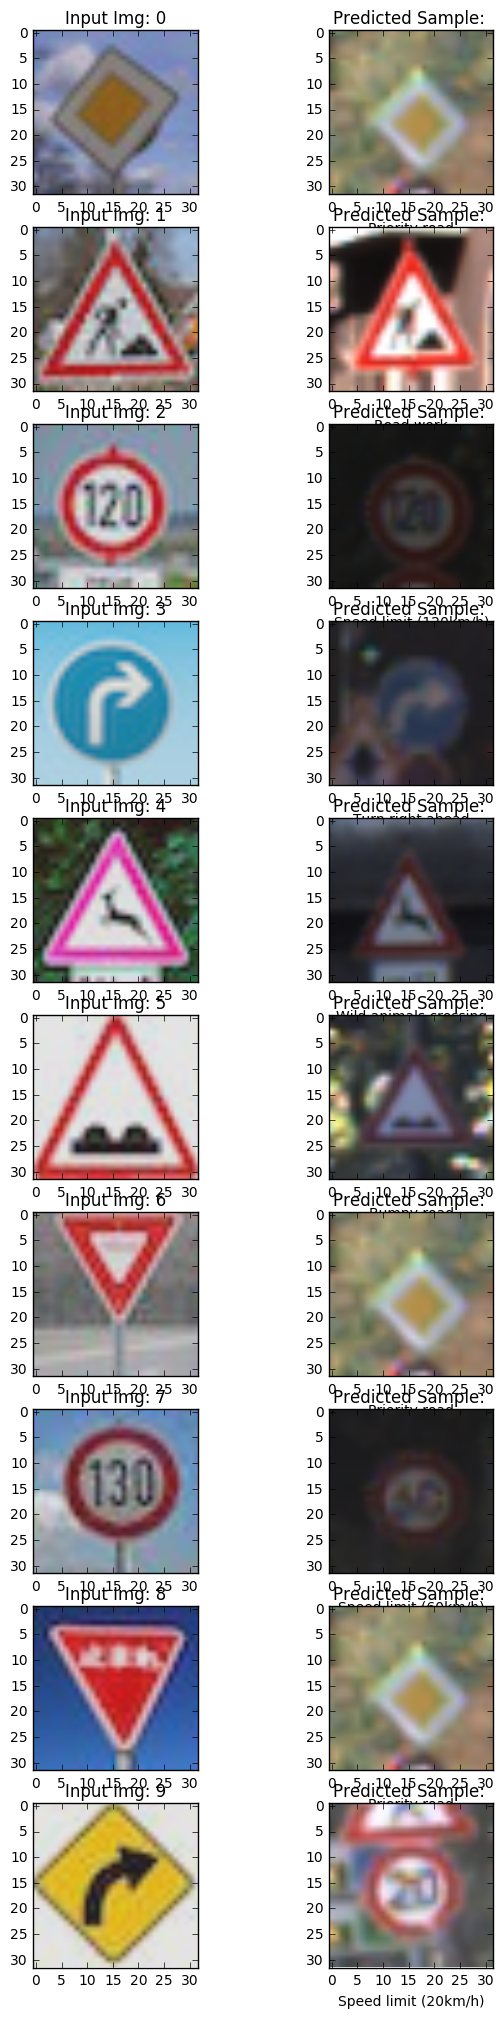

In [ ]:
to_show = []
for i in range(len(new_images)):
    input_image = new_images[i]
    input_image_prediction = new_predictions[i]
    sample_image = reff_dict2[input_image_prediction]
    to_show.append(input_image)
    to_show.append(sample_image)

# Create the figure
fig = plt.figure(figsize=(7,25))
for i in range(len(to_show)):
    ax = fig.add_subplot(10,2,i+1)
    if(i%2==0):
        ax.set_title('Input Img: ' + str(i//2))
    else:
        image_index = (i-1)//2
        prediction = new_predictions[image_index]
        prediction_class_string = class_map[prediction]
        ax.set_title('Predicted Sample: ' )
        ax.set_xlabel(prediction_class_string)
    plt.imshow(to_show[i].squeeze())

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The model correctly predicts 6 out of the 7 trained images. The model provides a descent prediction for the 8th image, which is very similar to images it has been trained on. The model does not provide a good prediction for the last 2 images however this is expected since they are completely untrained for. The only result that is truly surpsing is the output for the Yield sign. I ran the model several times and was not able to classify that one correctly. I am curious to see what the model beleives a Yield sign actually looks like.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

**Answer:**
Visualizing the certainty of the predictions was very interesing (seen below). The model is very certain of almost all of its predictions, even the ones that are incorrect. There are only 3 images of the 10 provided that do not return 100% certainty. The most interesting one again for me was the Yield sign. It is an image that was trained for, however the model provides an incorrect prediction and the Top 5 predictions do not include the correct answer. The Yield sign I used is not centered around the sign like the other images I used. But I do not beleive this is the issue.

In [ ]:
# Visualize Data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top5Predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x:new_images, dropout:1.0} )
print("Top 5 Beleifs")
print(np.round(top5Predictions.values, decimals=3))
print("Indices")
print(top5Predictions.indices)

Top 5 Beleifs
[[ 1.     0.     0.     0.     0.   ]
 [ 1.     0.     0.     0.     0.   ]
 [ 0.984  0.016  0.     0.     0.   ]
 [ 1.     0.     0.     0.     0.   ]
 [ 1.     0.     0.     0.     0.   ]
 [ 1.     0.     0.     0.     0.   ]
 [ 1.     0.     0.     0.     0.   ]
 [ 0.993  0.005  0.001  0.     0.   ]
 [ 1.     0.     0.     0.     0.   ]
 [ 0.998  0.002  0.     0.     0.   ]]
Indices
[[12 34 13 25 38]
 [25 18 31 20 19]
 [ 8  7  5  4  1]
 [33 35  4 37 15]
 [31 21 25 18  0]
 [22 29 15 35 25]
 [12 38  6 13 32]
 [ 3  9 23  5 10]
 [12 13  0  1  2]
 [ 0  1  4  6  3]]


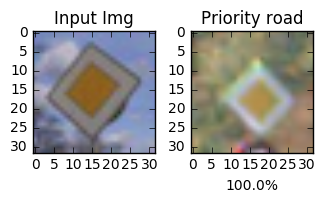

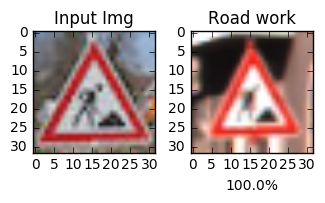

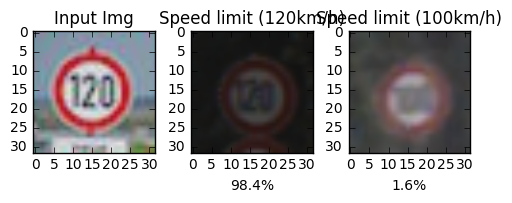

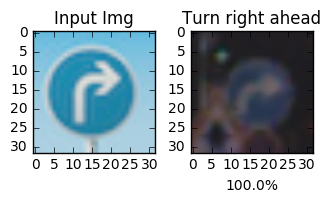

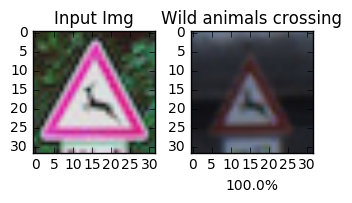

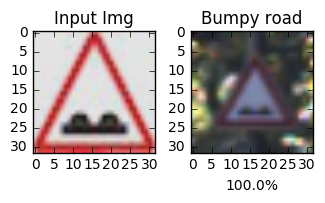

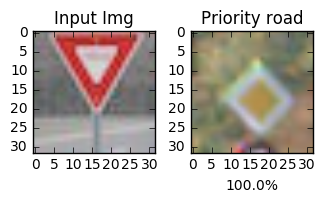

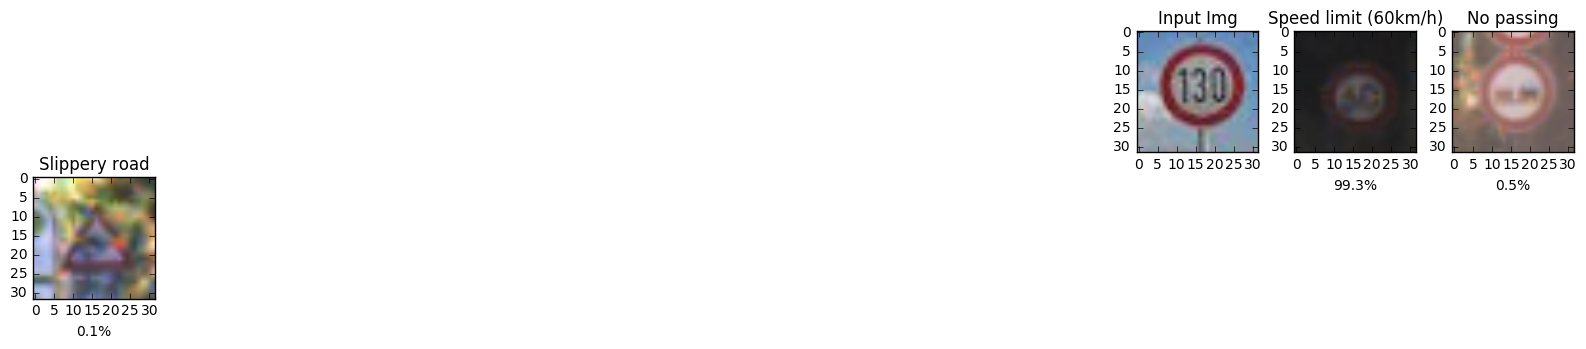

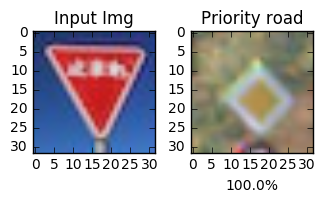

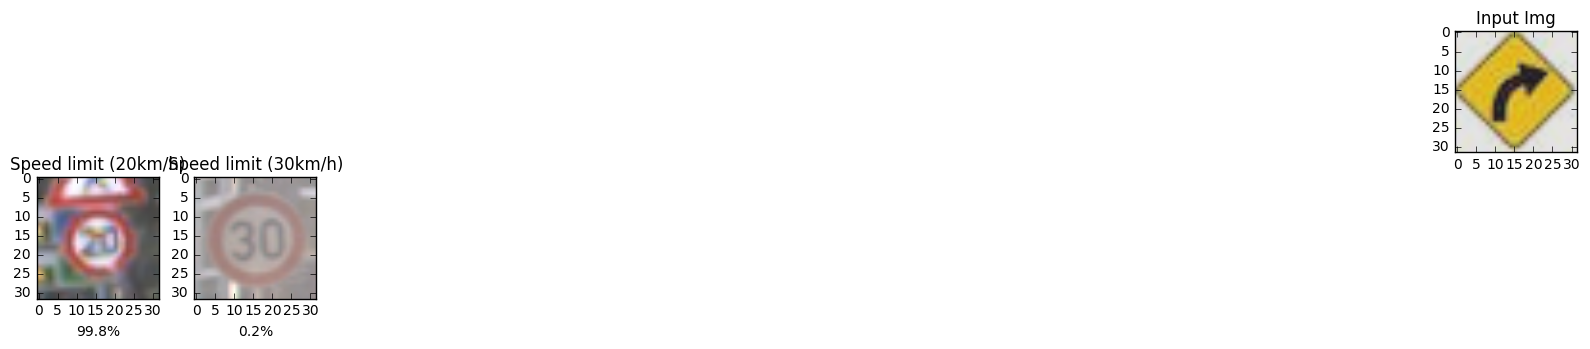

In [ ]:
# Visualize Images
for i in range(len(top5Predictions.values)):
    #print("Image:",i)
    fig = plt.figure(figsize=(20,11))
    ax = fig.add_subplot(6,10,i+1)
    #ax = fig.add_subplot(1,10,i+1)
    ax.set_title("Input Img")
    input_image = new_images[i]
    plt.imshow(input_image.squeeze())
    for j in range(5): #top 5 predictions
        certainty = np.round(top5Predictions.values[i][j], 3)
        classId = top5Predictions.indices[i][j]
        sample_of_class = reff_dict2[classId]
        if(certainty>0.0):
            #print("-->",j,certainty,classId)
            #print(i,j, i+1,i+1+j+1)
            ax = fig.add_subplot(6,10,i+1+j+1)
            ax.set_title(class_map[classId])
            ax.set_xlabel(str(round(certainty*100,4))+"%")
            plt.imshow(sample_of_class.squeeze())

NOTE: (The last two rows are mis-aligned.)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.